In [16]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
from pandas import DataFrame
import csv
from scipy.spatial import distance
import math
import re

import warnings
warnings.filterwarnings('ignore')

%matplotlib nbagg

In [17]:
PerFus_little_Monster = pd.read_csv("Participants_metrics_dataset.csv", index_col = 'Participant')

In [18]:
features = PerFus_little_Monster[['avgT_detection_VP','avgT_pointing_VP','avgT_action_VP','avgT_conf_VP', 'avg_length_point_VP',
                                'avg_length_gazeb_VP','avg_length_gazem_VP','avg_length_gazec_VP',
                                'avg_frequency_gazeb_VP','avg_frequency_gazem_VP','avg_frequency_gazec_VP']].dropna().to_numpy()
features.shape

(39, 11)

In [19]:
features_non_normal = PerFus_little_Monster[['avgT_pointing_VP','avgT_action_VP', 'avg_length_point_VP',
                                'avg_length_gazeb_VP','avg_length_gazem_VP',
                                'avg_frequency_gazeb_VP','avg_frequency_gazem_VP','avg_frequency_gazec_VP']].dropna().to_numpy()
features_non_normal.shape

(39, 8)

In [20]:
accuracy_features = PerFus_little_Monster[['Acc_gaze_per_VP','Acc_per_VP']].dropna().to_numpy()
accuracy_features.shape

(39, 2)

<IPython.core.display.Javascript object>


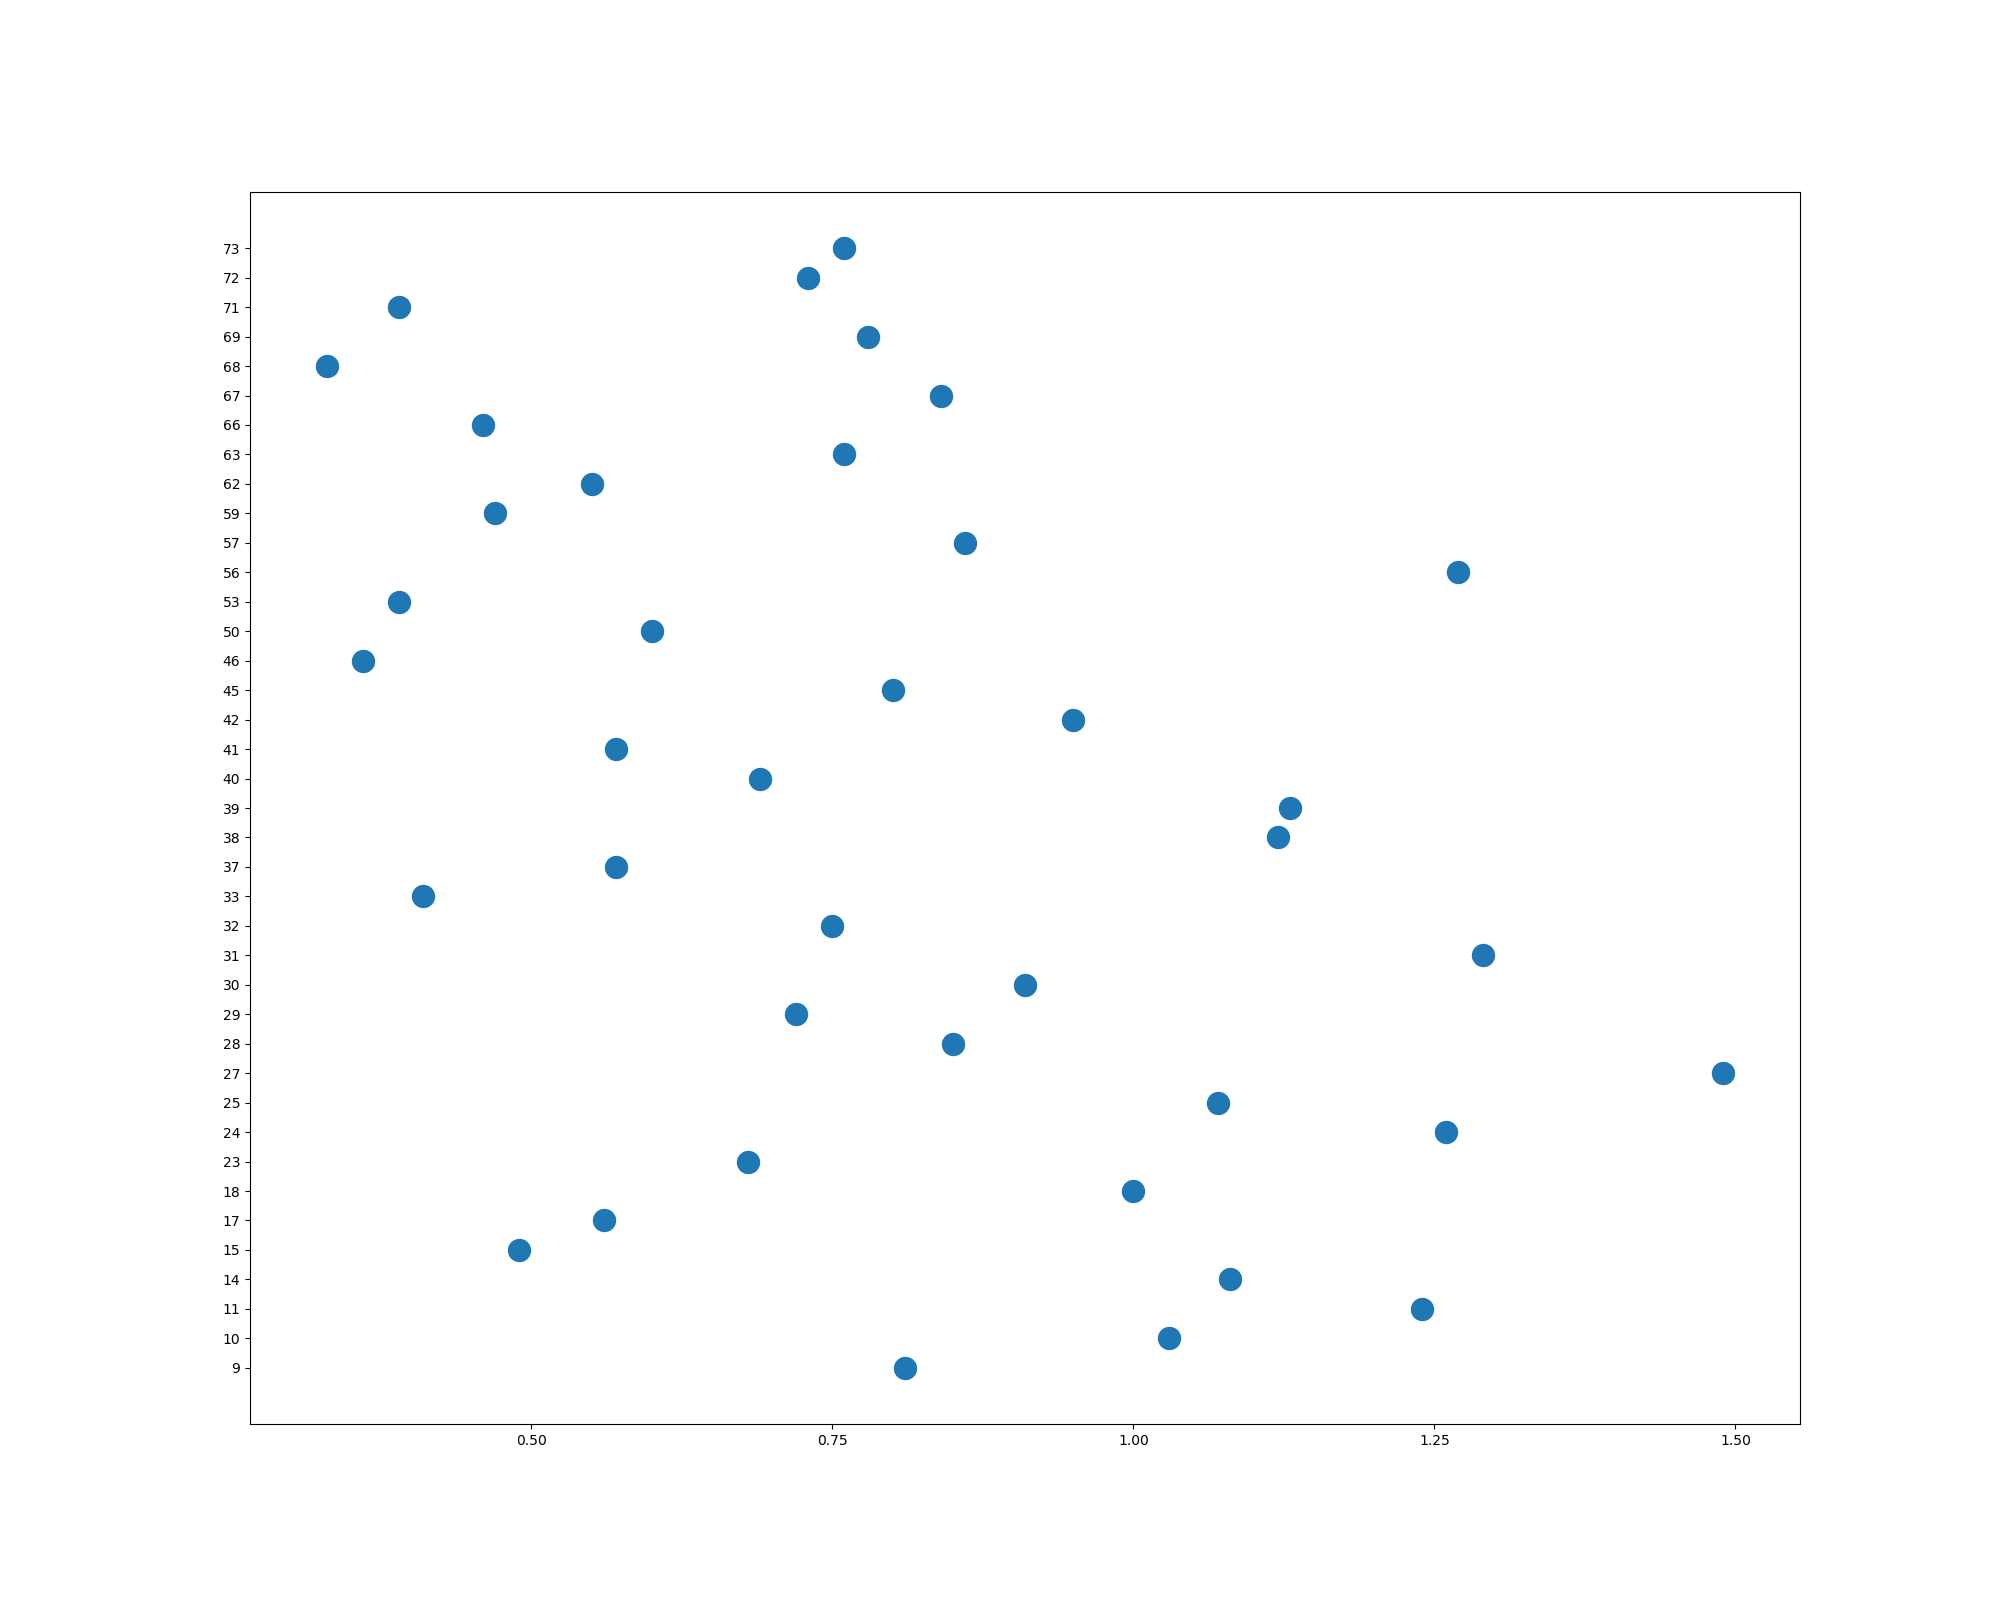

In [21]:
labels = PerFus_little_Monster.index.values.astype(str).tolist()
Y = labels
X = features[:,10]

plt.figure(figsize=(20, 16))
plt.scatter(X,Y,s= 250)
plt.show()

<IPython.core.display.Javascript object>


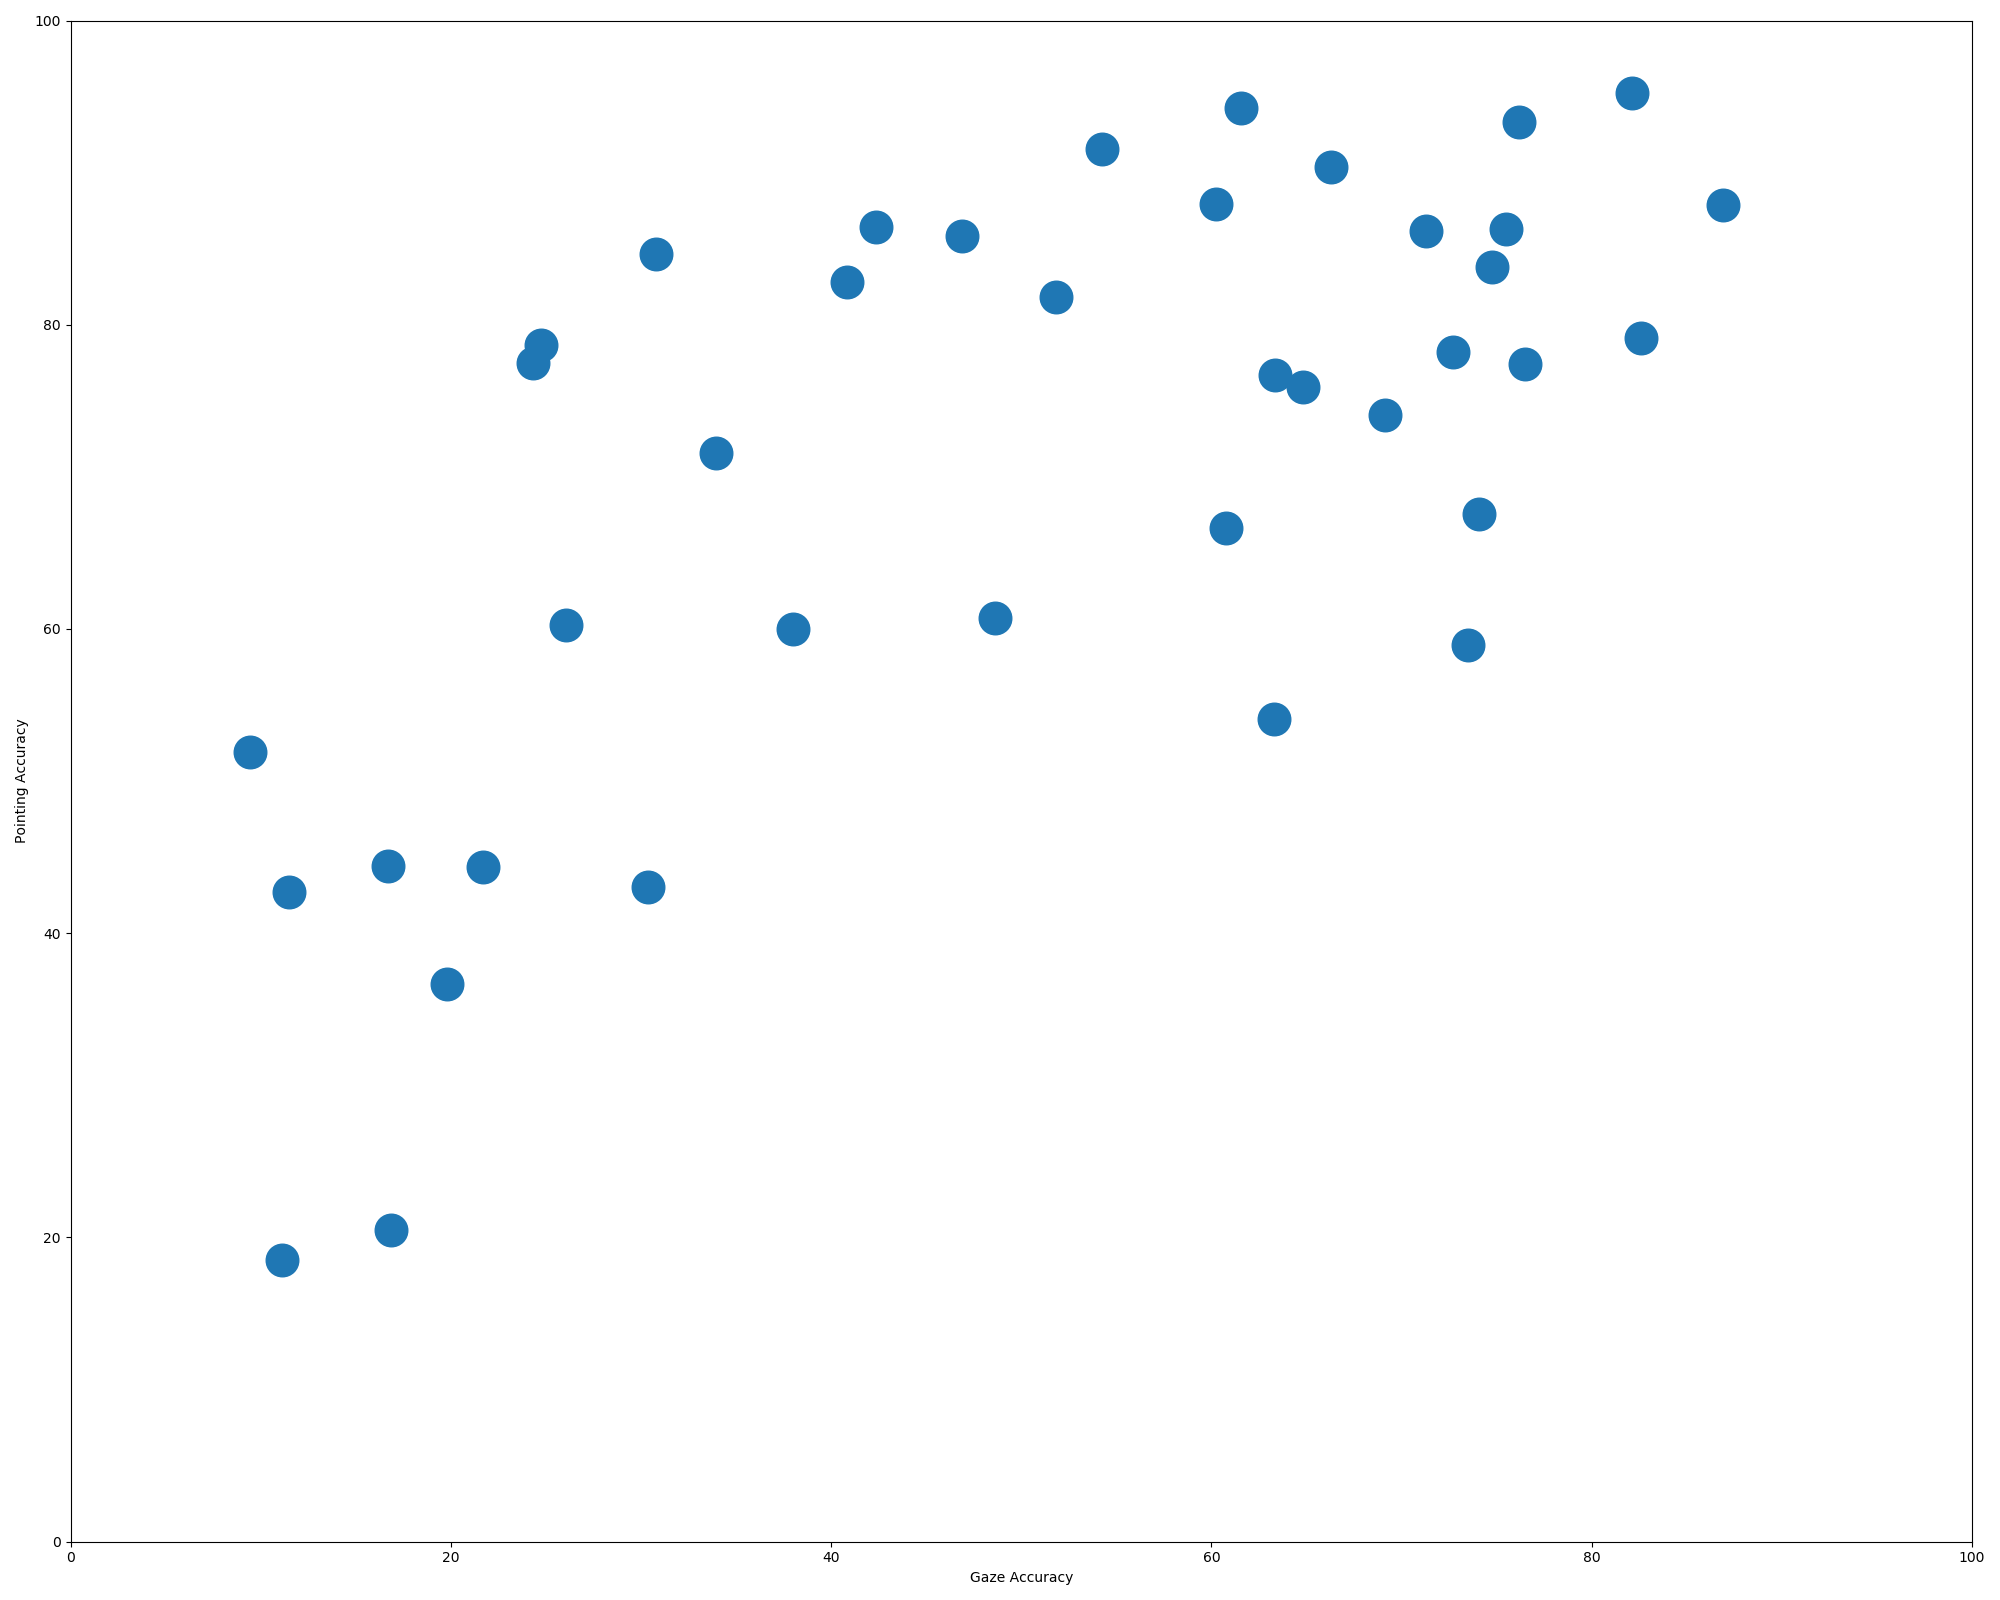

In [22]:
X = accuracy_features[:,0]
Y = accuracy_features[:,1]
labels = PerFus_little_Monster.index.values.astype(str).tolist()

plt.figure(figsize=(20, 16))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X,Y, label='True Position',s= 550)

# for label, x, y in zip(labels, X, Y):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-3, 3),
#         textcoords='offset points', ha='right', va='bottom')

plt.xlabel('Gaze Accuracy')
plt.ylabel('Pointing Accuracy')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.rcParams.update({'font.size': 48})
# plt.savefig('distribution_accuracies_2.png')
plt.show()


<IPython.core.display.Javascript object>


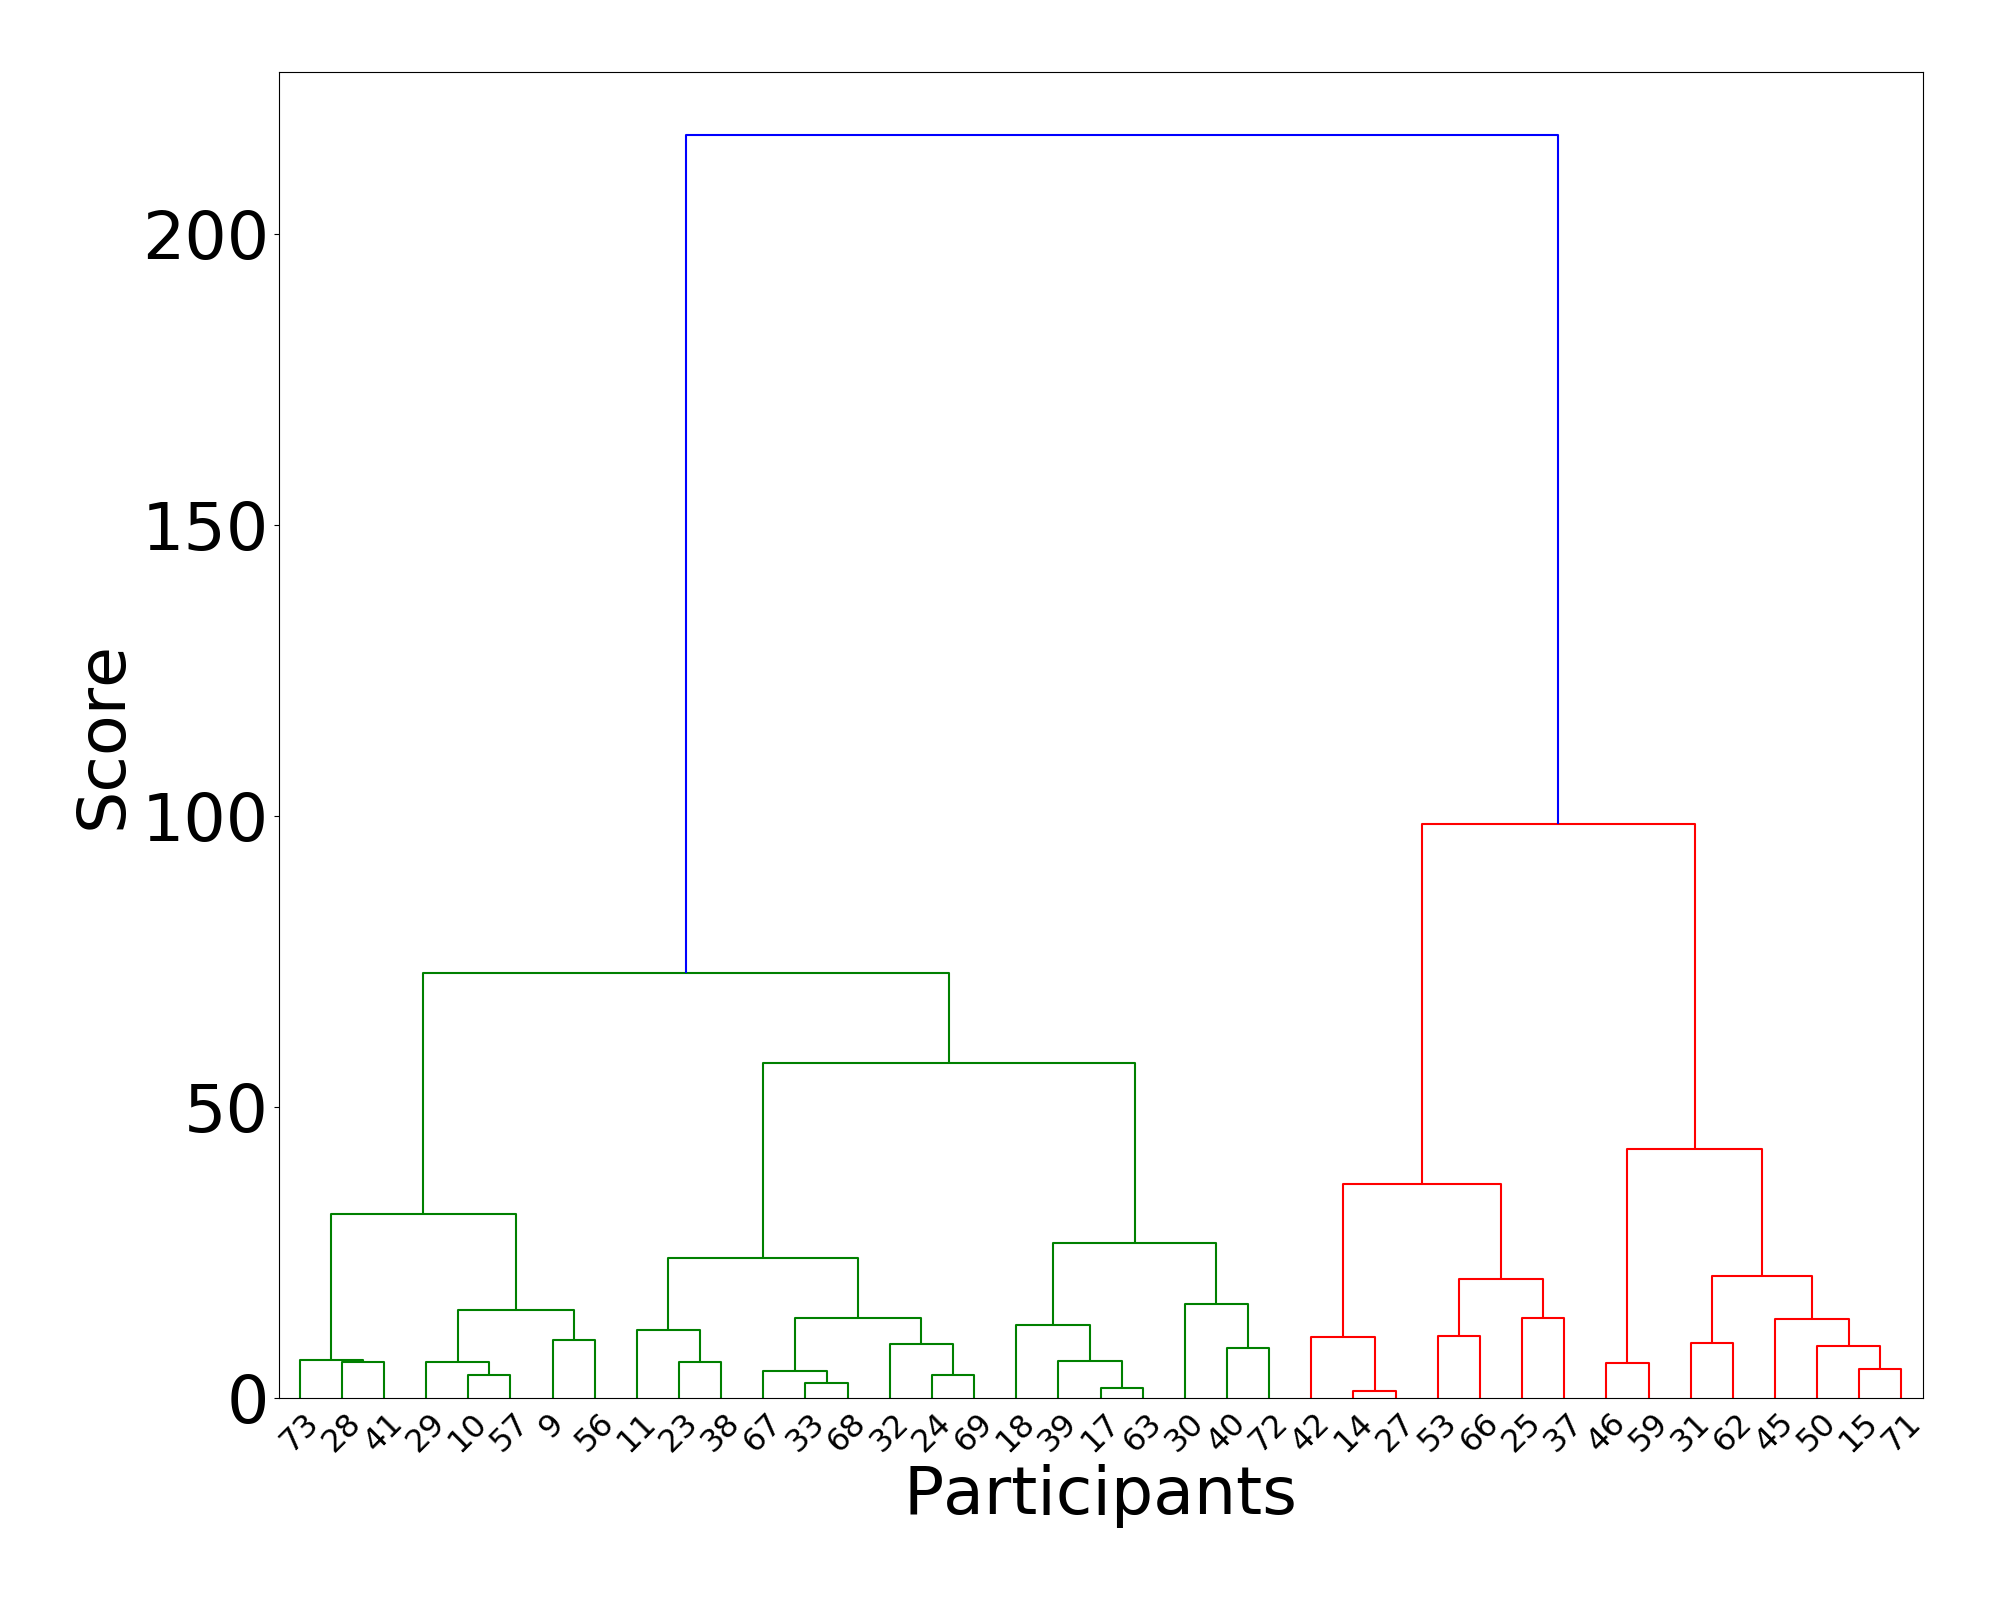

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(accuracy_features, 'ward')

labelList = labels

plt.figure(figsize=(20, 16))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True, leaf_font_size =23,no_labels=False)
plt.xlabel('Participants')
plt.ylabel('Score')
plt.tight_layout()
plt.rcParams.update({'font.size': 48})
#plt.savefig('dendogram_accuracies.pdf')
plt.show()

[3 3 0 2 1 0 0 0 0 2 2 3 3 0 1 0 0 2 0 0 0 3 2 1 1 1 2 3 3 1 1 0 2 0 0 0 1
 0 3]


<IPython.core.display.Javascript object>


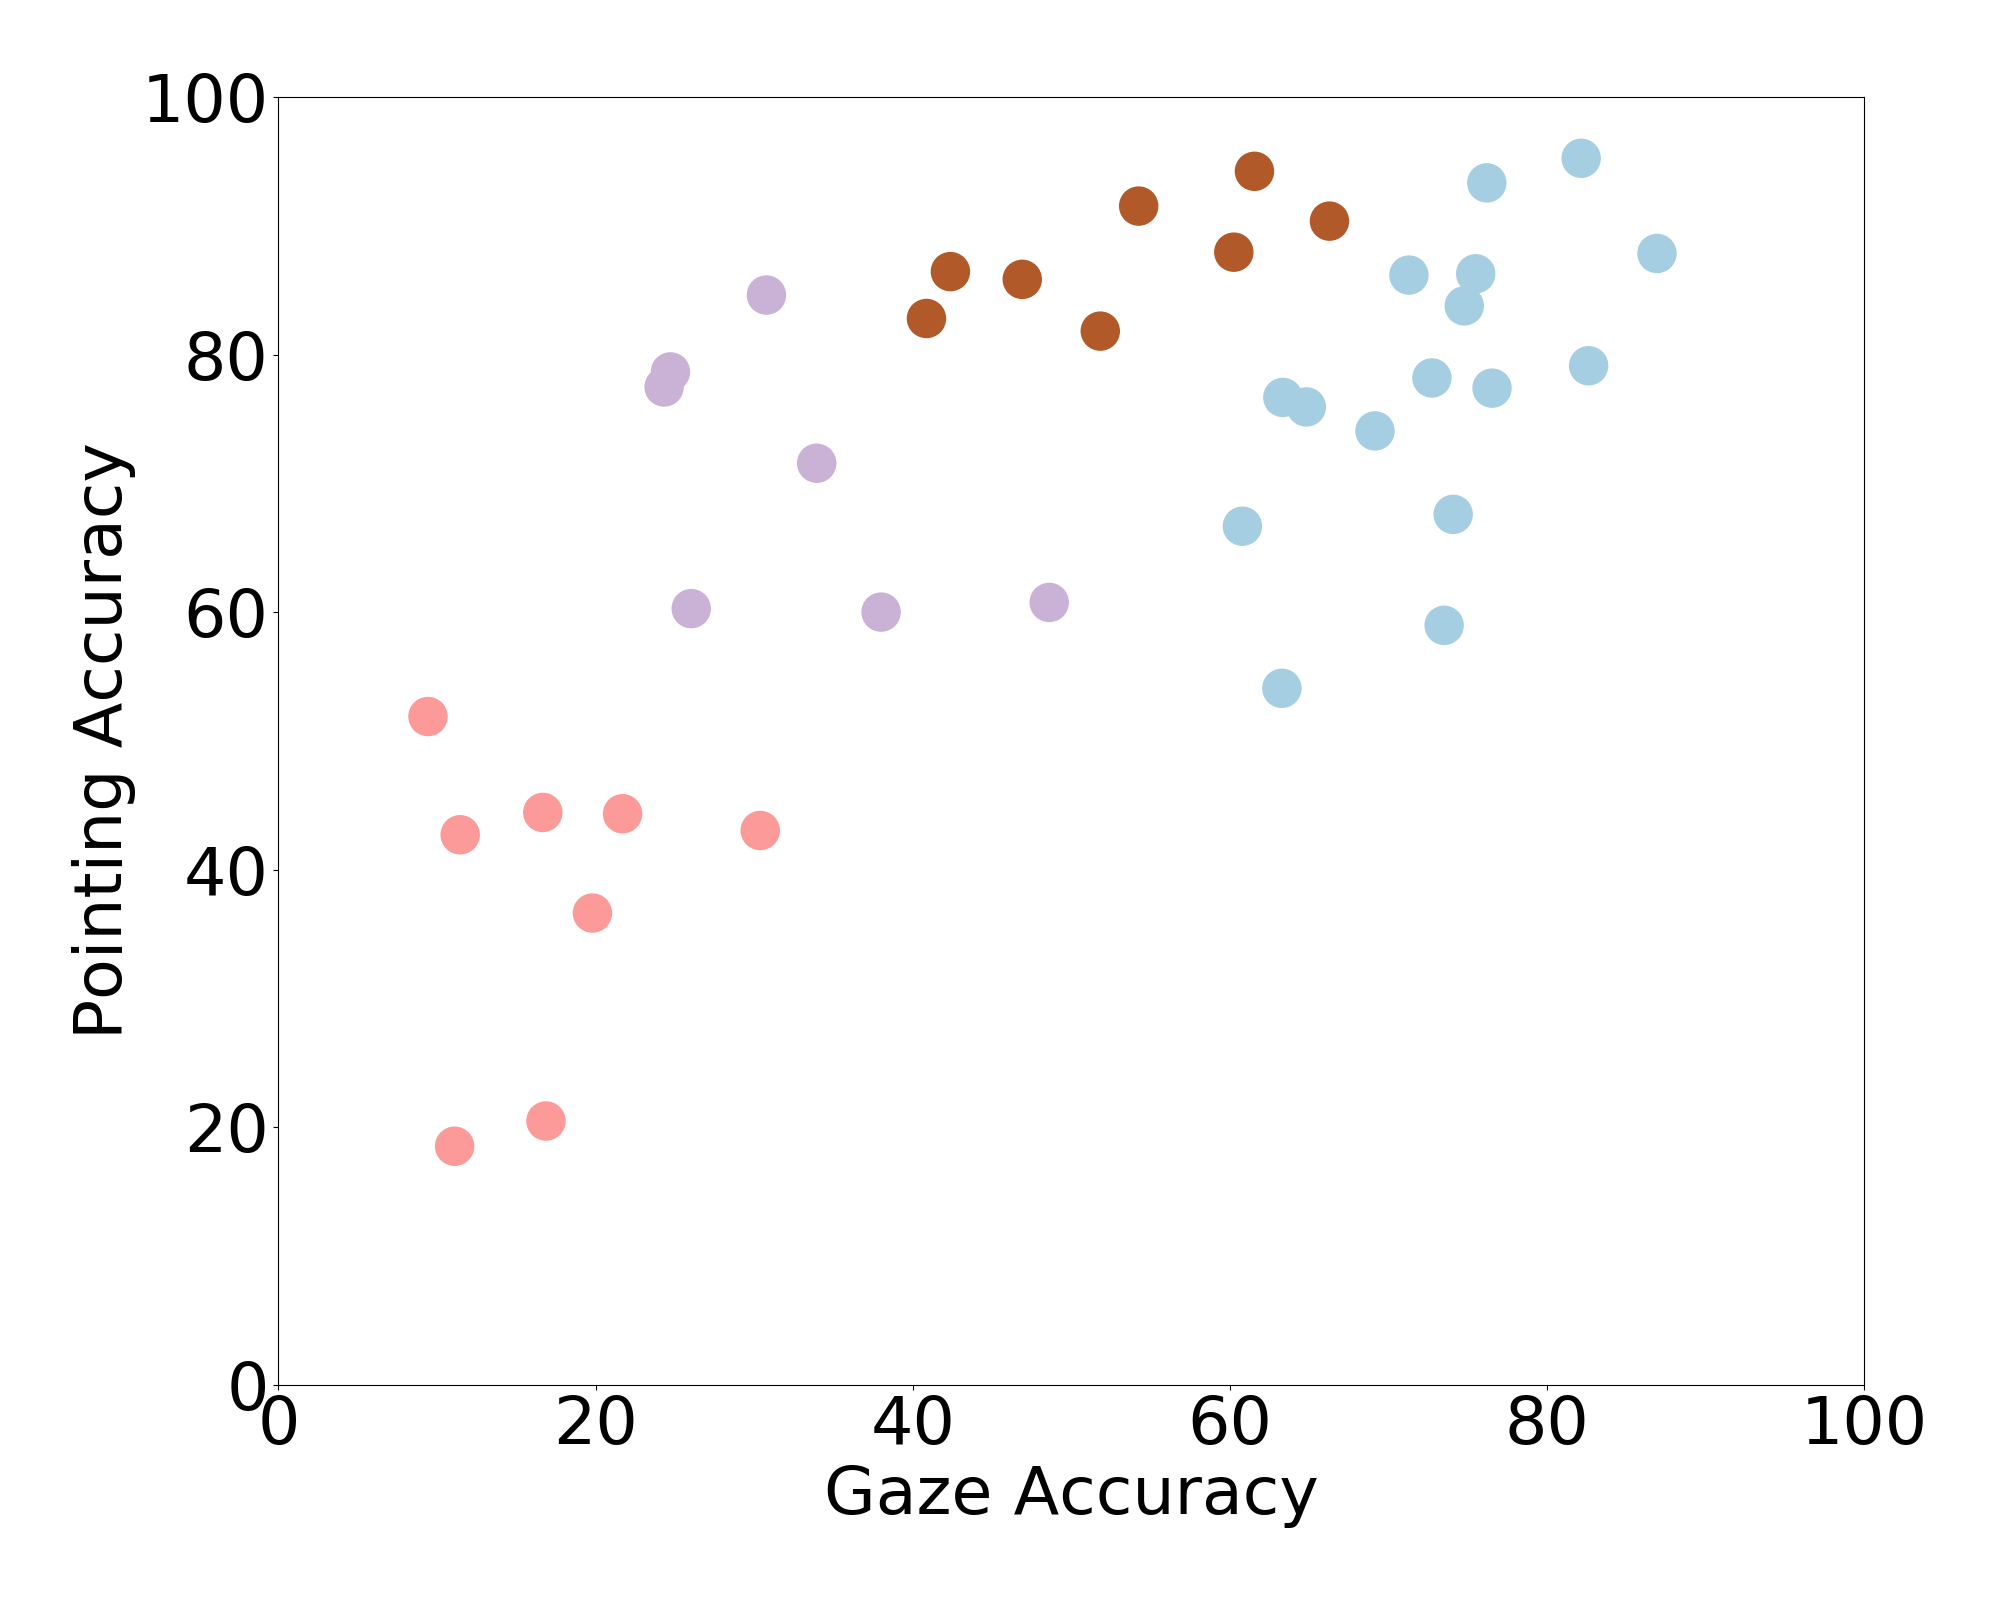

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(accuracy_features)

print(cluster.labels_)

pca = PCA(n_components=2).fit_transform(accuracy_features)

fig, ax = plt.subplots(figsize=(20, 16))
scatter = ax.scatter(accuracy_features[:, 0], accuracy_features[:, 1], c=cluster.labels_, s=750, cmap='Paired')
plt.xlabel('Gaze Accuracy')
plt.ylabel('Pointing Accuracy')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

#plt.xlabel('First Principal Component')
#plt.ylabel('Second Principal Componenet')


# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scatter.legend_elements(),
#                    loc="upper right", title="Clusters")
#ax.add_artist(legend1)
plt.tight_layout()
plt.rcParams.update({'font.size': 48})
# plt.savefig('heirarch_cluster_accuracies_3.pdf')
plt.show()

<IPython.core.display.Javascript object>


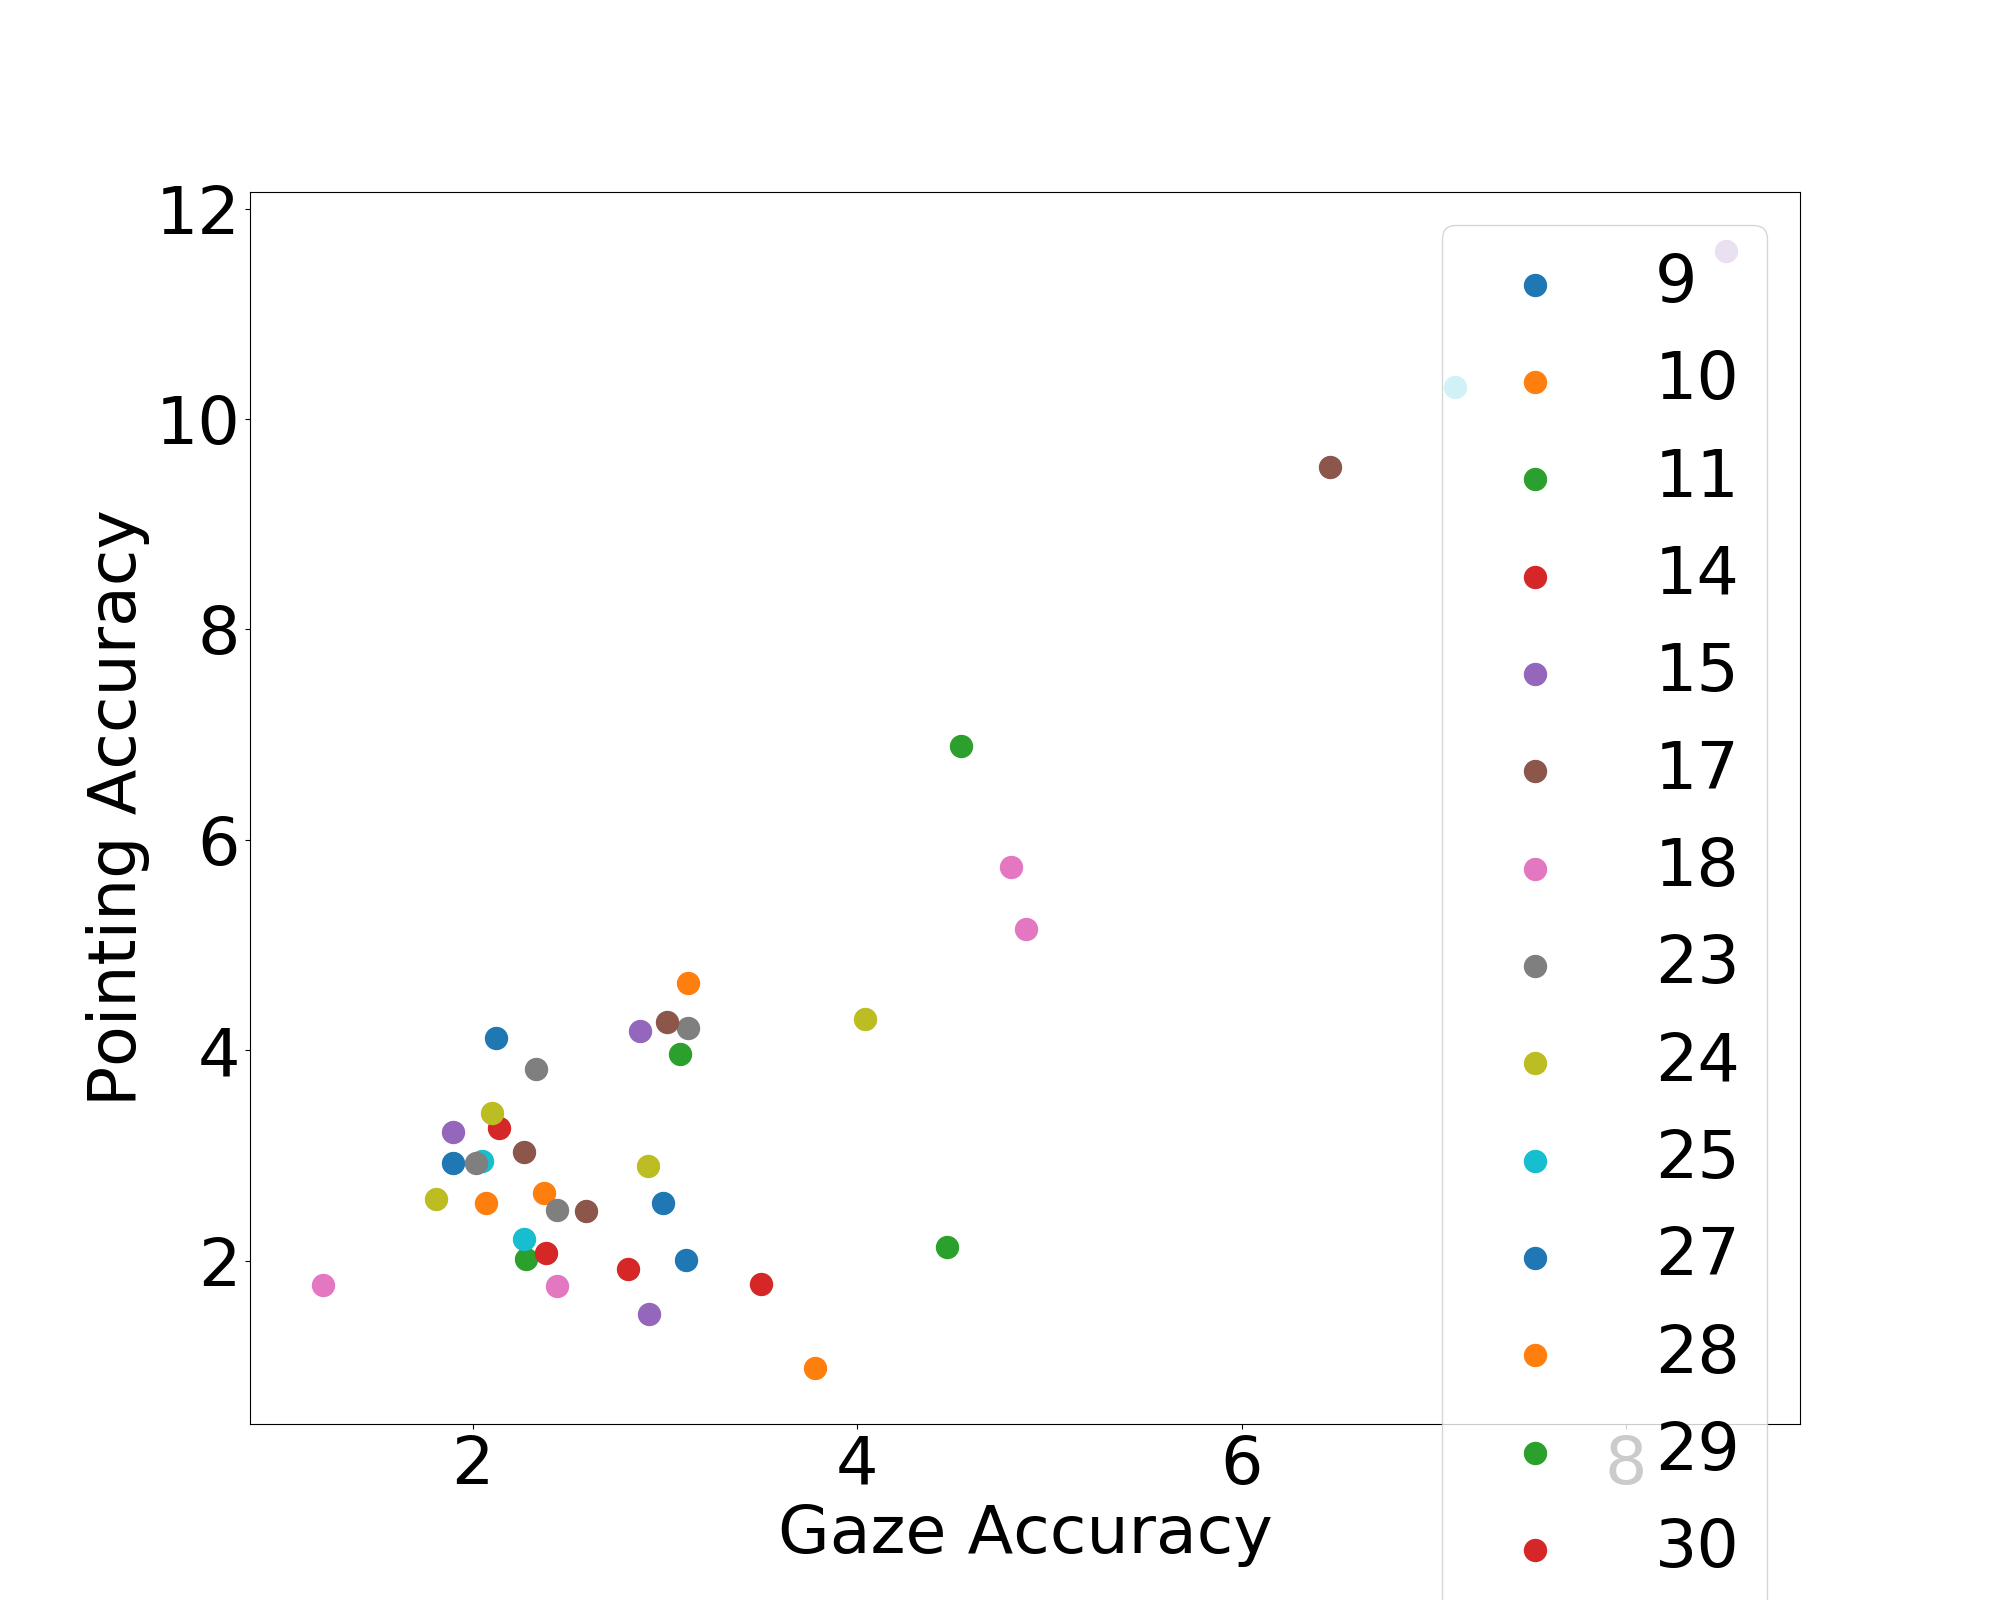

In [25]:
x = features[:,0]
y = features[:,1]
labels = PerFus_little_Monster.index.values.astype(str).tolist()

plt.figure(figsize=(20, 16))

for i in range(0,len(x)):
    plt.scatter(x[i], y[i], label=labels[i], s= 250)

#plt.title('Participants\' average Pointing time vs ')
plt.xlabel('Gaze Accuracy')
plt.ylabel('Pointing Accuracy')
plt.legend(loc=1)
plt.tight_layout()
plt.rcParams.update({'font.size': 18})
# plt.savefig('timedv.png')
plt.show()

[-37014.39773333334, -13483.08927692308, -7418.838716136341, -5622.512857499978, -4303.314156547628, -3251.05649988096, -2650.190402857155, -2250.325117857135, -1796.4997845238036, -1584.2593666666685, -1405.51001111111, -1113.5859249999908, -1062.0820416666525, -897.4682999999865, -804.4711416666547, -731.8547500000001, -635.6585333333259, -587.1491583333315, -511.3165249999912, -440.1879083333305, -381.917333333328, -337.7206833333295, -294.0078499999928, -246.5884166666675, -202.87558333333084, -162.4783666666641, -140.9375333333261, -120.48566666665795, -100.87258333332613, -81.34728333333226, -62.672383333335915, -44.16278333333594, -31.507333333335737, -20.751649999999245, -12.986799999997857, -5.492699999997967, -2.1334500000020853, -0.7644500000033077, -1.8189894035458565e-12]


<IPython.core.display.Javascript object>


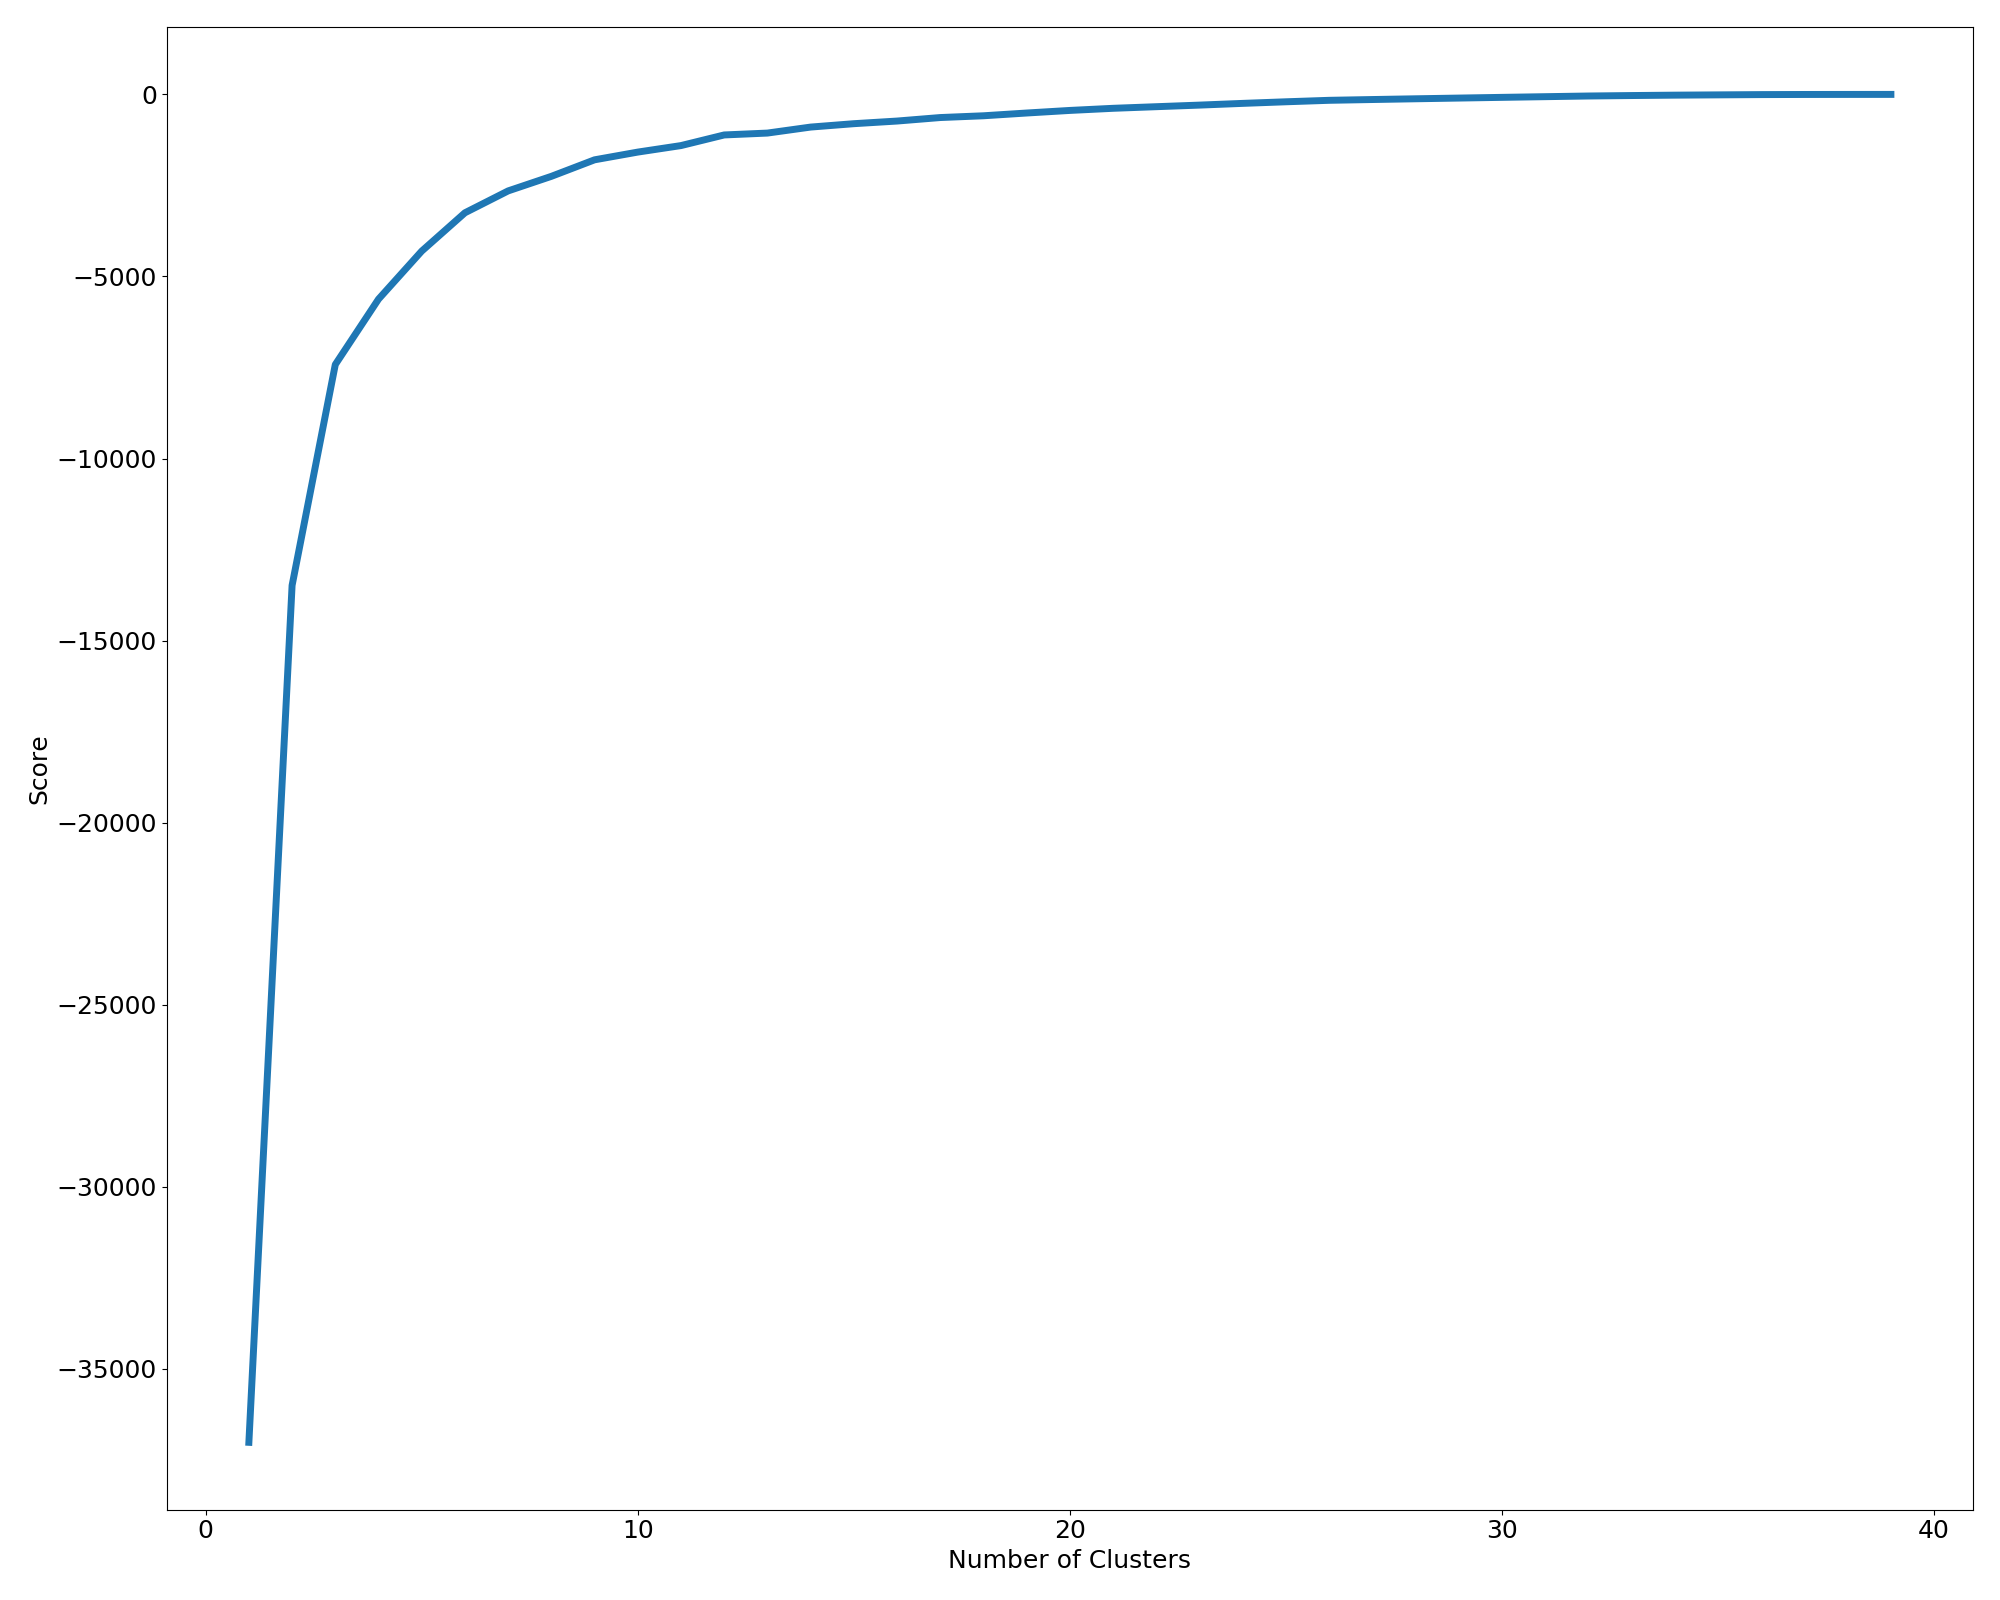

In [26]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA


Nc = range(1, 40)
kmeans = [KMeans(n_clusters=i, random_state=420) for i in Nc]
score = [kmeans[i].fit(accuracy_features).score(accuracy_features) for i in range(len(kmeans))]
print(score)
plt.figure(figsize=(20, 16))
plt.plot(Nc,score,linewidth=5)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.rcParams.update({'font.size': 18})
# plt.savefig('elbowcurve_timedv.pdf')
plt.show()

(39, 2)
cluster  0
length  11
[ 0  1  3  9 10 12 17 22 26 28 32]
-----------------------------------
cluster  1
length  20
[ 2  5  6  7  8 11 13 15 16 18 19 20 21 27 31 33 34 35 37 38]
-----------------------------------
cluster  2
length  8
[ 4 14 23 24 25 29 30 36]
-----------------------------------


<IPython.core.display.Javascript object>


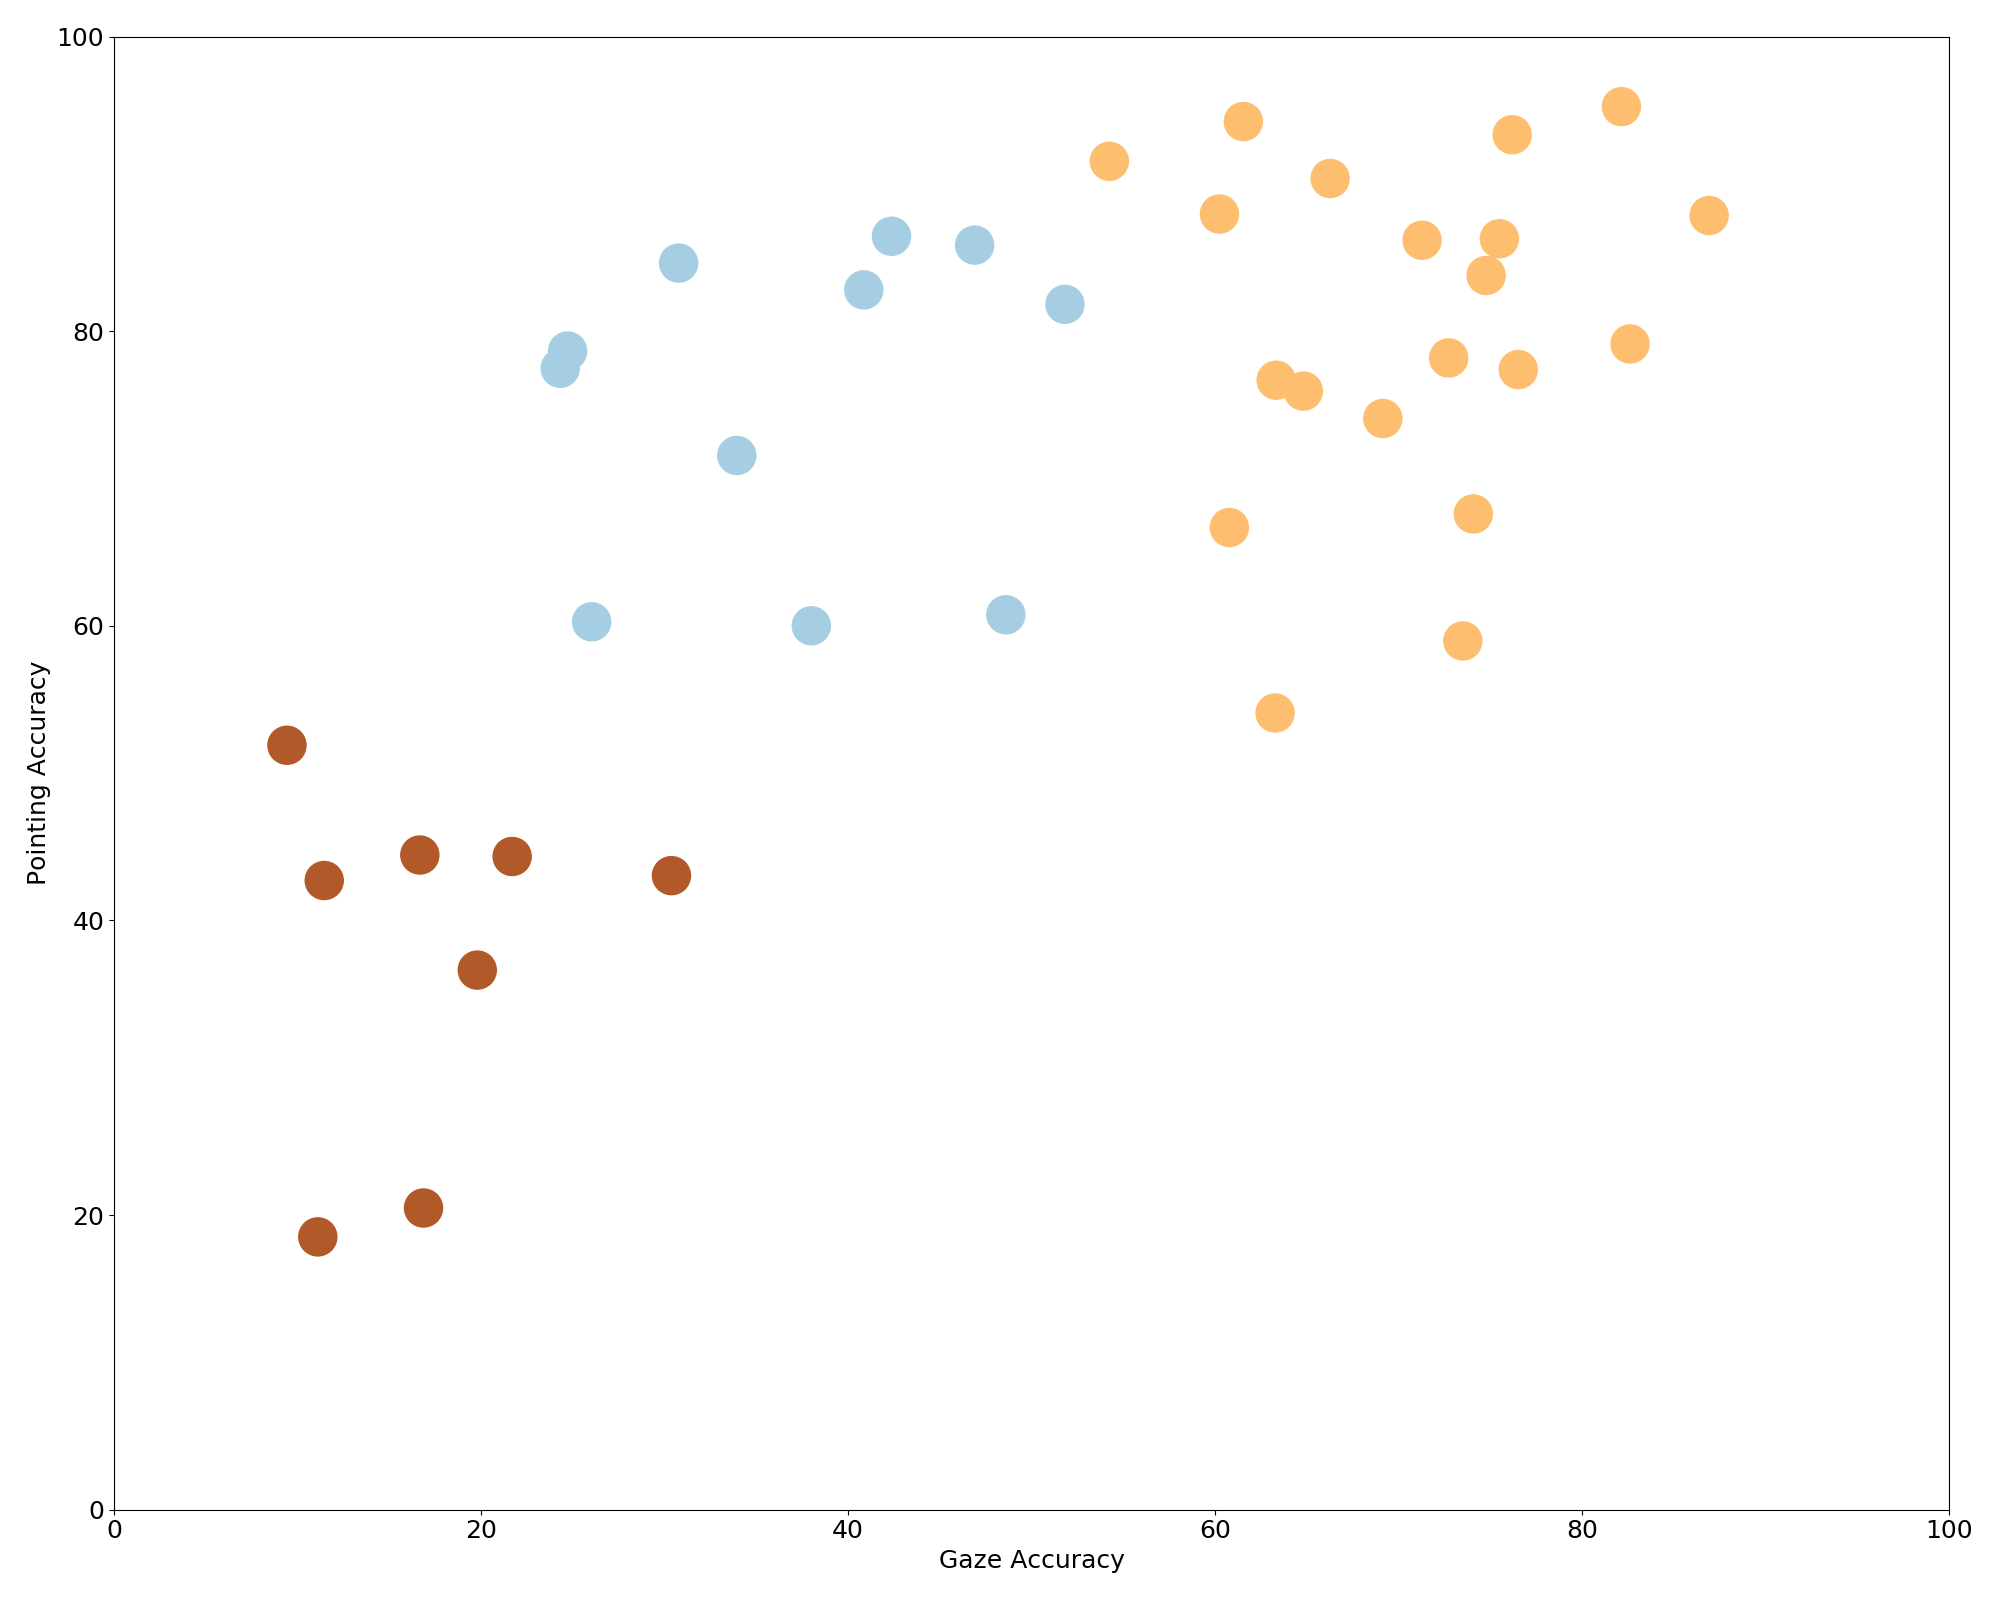

In [27]:


N = 3

pca = PCA(n_components=2).fit_transform(accuracy_features)
print(pca.shape)
print("==========================")


kmeans = KMeans(n_clusters=N, random_state=420).fit(accuracy_features)
#kmeans.labels_.shape

for i in range(N):
    print("cluster ",i)
    print("length ",np.where(kmeans.labels_ == i)[0].shape[0])
    print(np.where(kmeans.labels_ == i)[0])
    print("-----------------------------------")
    

fig, ax = plt.subplots(figsize=(20, 16))
scatter = ax.scatter(accuracy_features[:, 0], accuracy_features[:, 1], c=kmeans.labels_, s=750, cmap='Paired')
plt.xlabel('Gaze Accuracy')
plt.ylabel('Pointing Accuracy')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# scatter = ax.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_, s=750, cmap='Paired')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Componenet')


# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scatter.legend_elements(),
#                    loc="upper right", title="Clusters")
#ax.add_artist(legend1)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 15})
# plt.savefig('kmeans_cluster_timedv.pdf')
plt.show()

[0 0 2 0 1 2 2 0 2 1 0 0 0 2 1 2 2 1 2 2 2 0 0 1 1 1 1 0 0 1 1 2 2 2 2 2 1
 2 0]
cluster  0
length  12
[ 0  1  3  7 10 11 12 21 22 27 28 38]
-----------------------------------
[ 9 10 14 23 27 28 29 41 42 56 57 73]
-----------------------------------
cluster  1
length  11
[ 4  9 14 17 23 24 25 26 29 30 36]
-----------------------------------
[15 25 31 37 45 46 50 53 59 62 71]
-----------------------------------
cluster  2
length  16
[ 2  5  6  8 13 15 16 18 19 20 31 32 33 34 35 37]
-----------------------------------
[11 17 18 24 30 32 33 38 39 40 63 66 67 68 69 72]
-----------------------------------


<IPython.core.display.Javascript object>


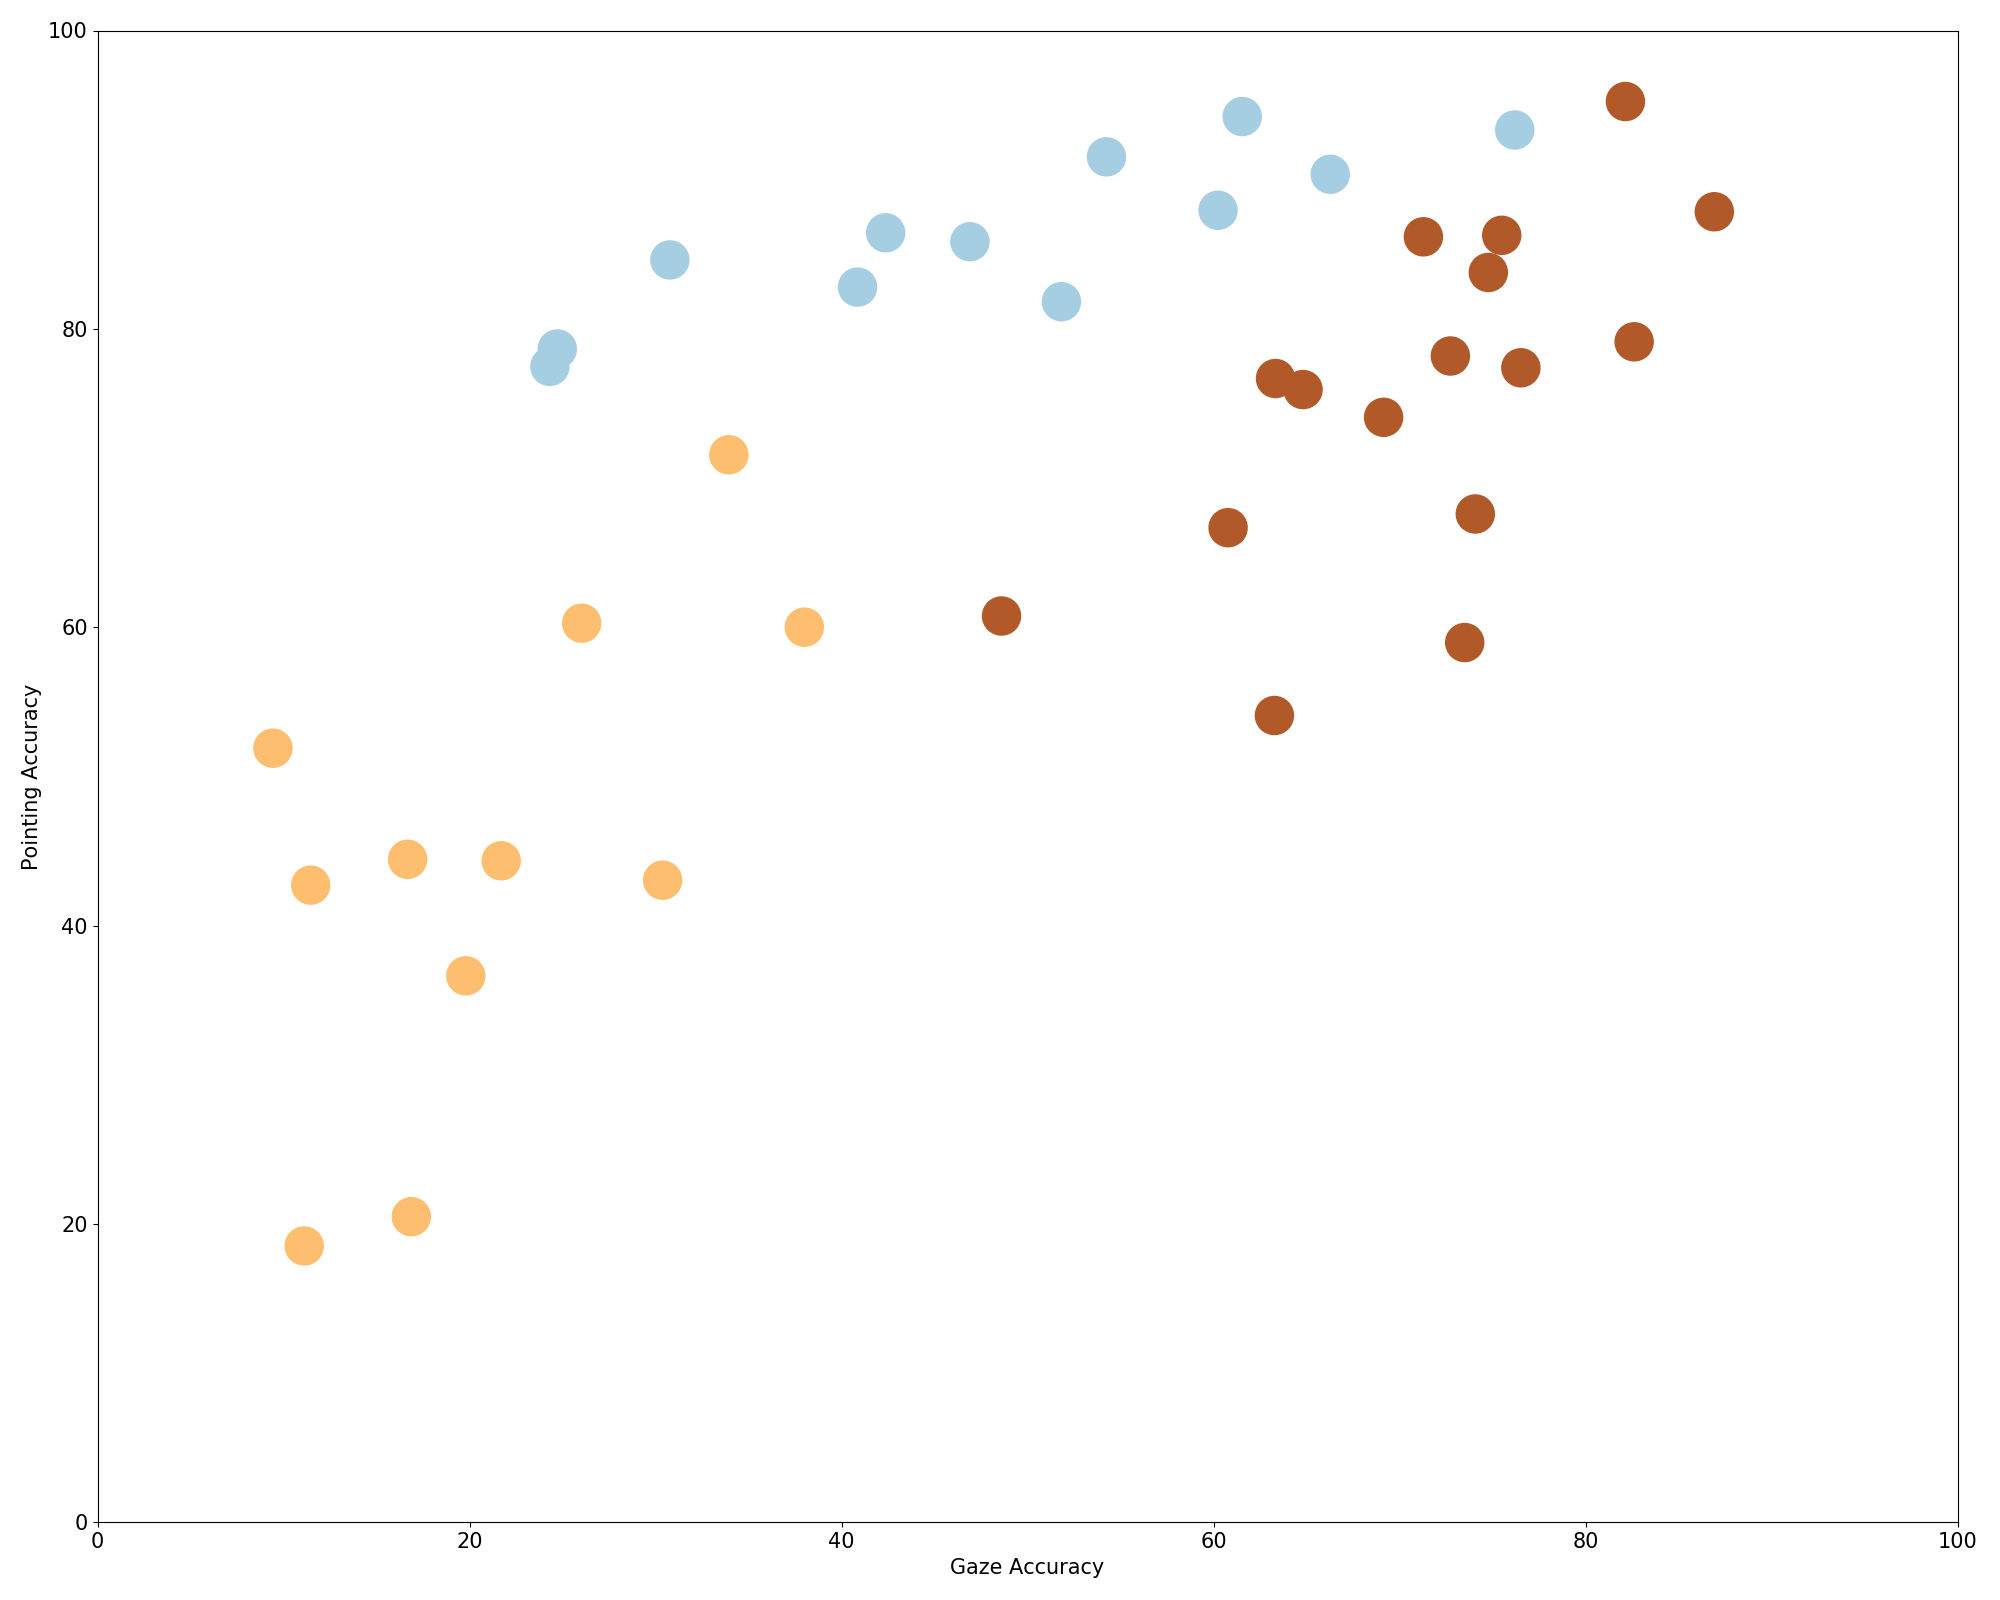

In [28]:
from sklearn.mixture import GaussianMixture

N=3

gmm = GaussianMixture(n_components=N, random_state=420, init_params= 'random', covariance_type='full').fit(accuracy_features)
labels = gmm.predict(accuracy_features)
print(labels)

labels__ = PerFus_little_Monster.index.values.astype(str).tolist()
labels__int = PerFus_little_Monster.index.values

for i in range(N):
    print("cluster ",i)
    print("length ",np.where(labels == i)[0].shape[0])
    print(np.where(labels == i)[0])
    print("-----------------------------------")
    print(labels__int[np.where(labels == i)[0]])
    print("-----------------------------------")
    

fig, ax = plt.subplots(figsize=(20, 16))
scatter = ax.scatter(accuracy_features[:, 0], accuracy_features[:, 1], c=labels, s=750, cmap='Paired')



# plt.figure(figsize=(20, 16))
# plt.subplots_adjust(bottom=0.1)
# plt.scatter(X,Y, label='True Position',s= 550)

# for label, x, y in zip(labels__, X, Y):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-3, 3),
#         textcoords='offset points', ha='right', va='bottom')


plt.xlabel('Gaze Accuracy')
plt.ylabel('Pointing Accuracy')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# scatter = ax.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_, s=750, cmap='Paired')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Componenet')


# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scatter.legend_elements(),
#                    loc="upper right", title="Clusters")
#ax.add_artist(legend1)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 48})
# ax.patch.set_visible(False)
# ax.axis('off')
# plt.ylim(0, 1)
# plt.savefig('GMM_Example.png')
# plt.savefig('GaussianMixture_full.png')
plt.show()

cluster  0
length  4
[ 0  1 12 28]
-----------------------------------
cluster  1
length  2
[14 30]
-----------------------------------
cluster  2
length  9
[ 5  8 15 16 19 31 33 34 35]
-----------------------------------
cluster  3
length  2
[24 29]
-----------------------------------
cluster  4
length  2
[26 32]
-----------------------------------
cluster  5
length  4
[ 4 23 25 36]
-----------------------------------
cluster  6
length  4
[ 3  9 10 22]
-----------------------------------
cluster  7
length  4
[11 21 27 38]
-----------------------------------
cluster  8
length  4
[ 6 13 20 37]
-----------------------------------
cluster  9
length  1
[17]
-----------------------------------
cluster  10
length  3
[ 2  7 18]
-----------------------------------


<IPython.core.display.Javascript object>


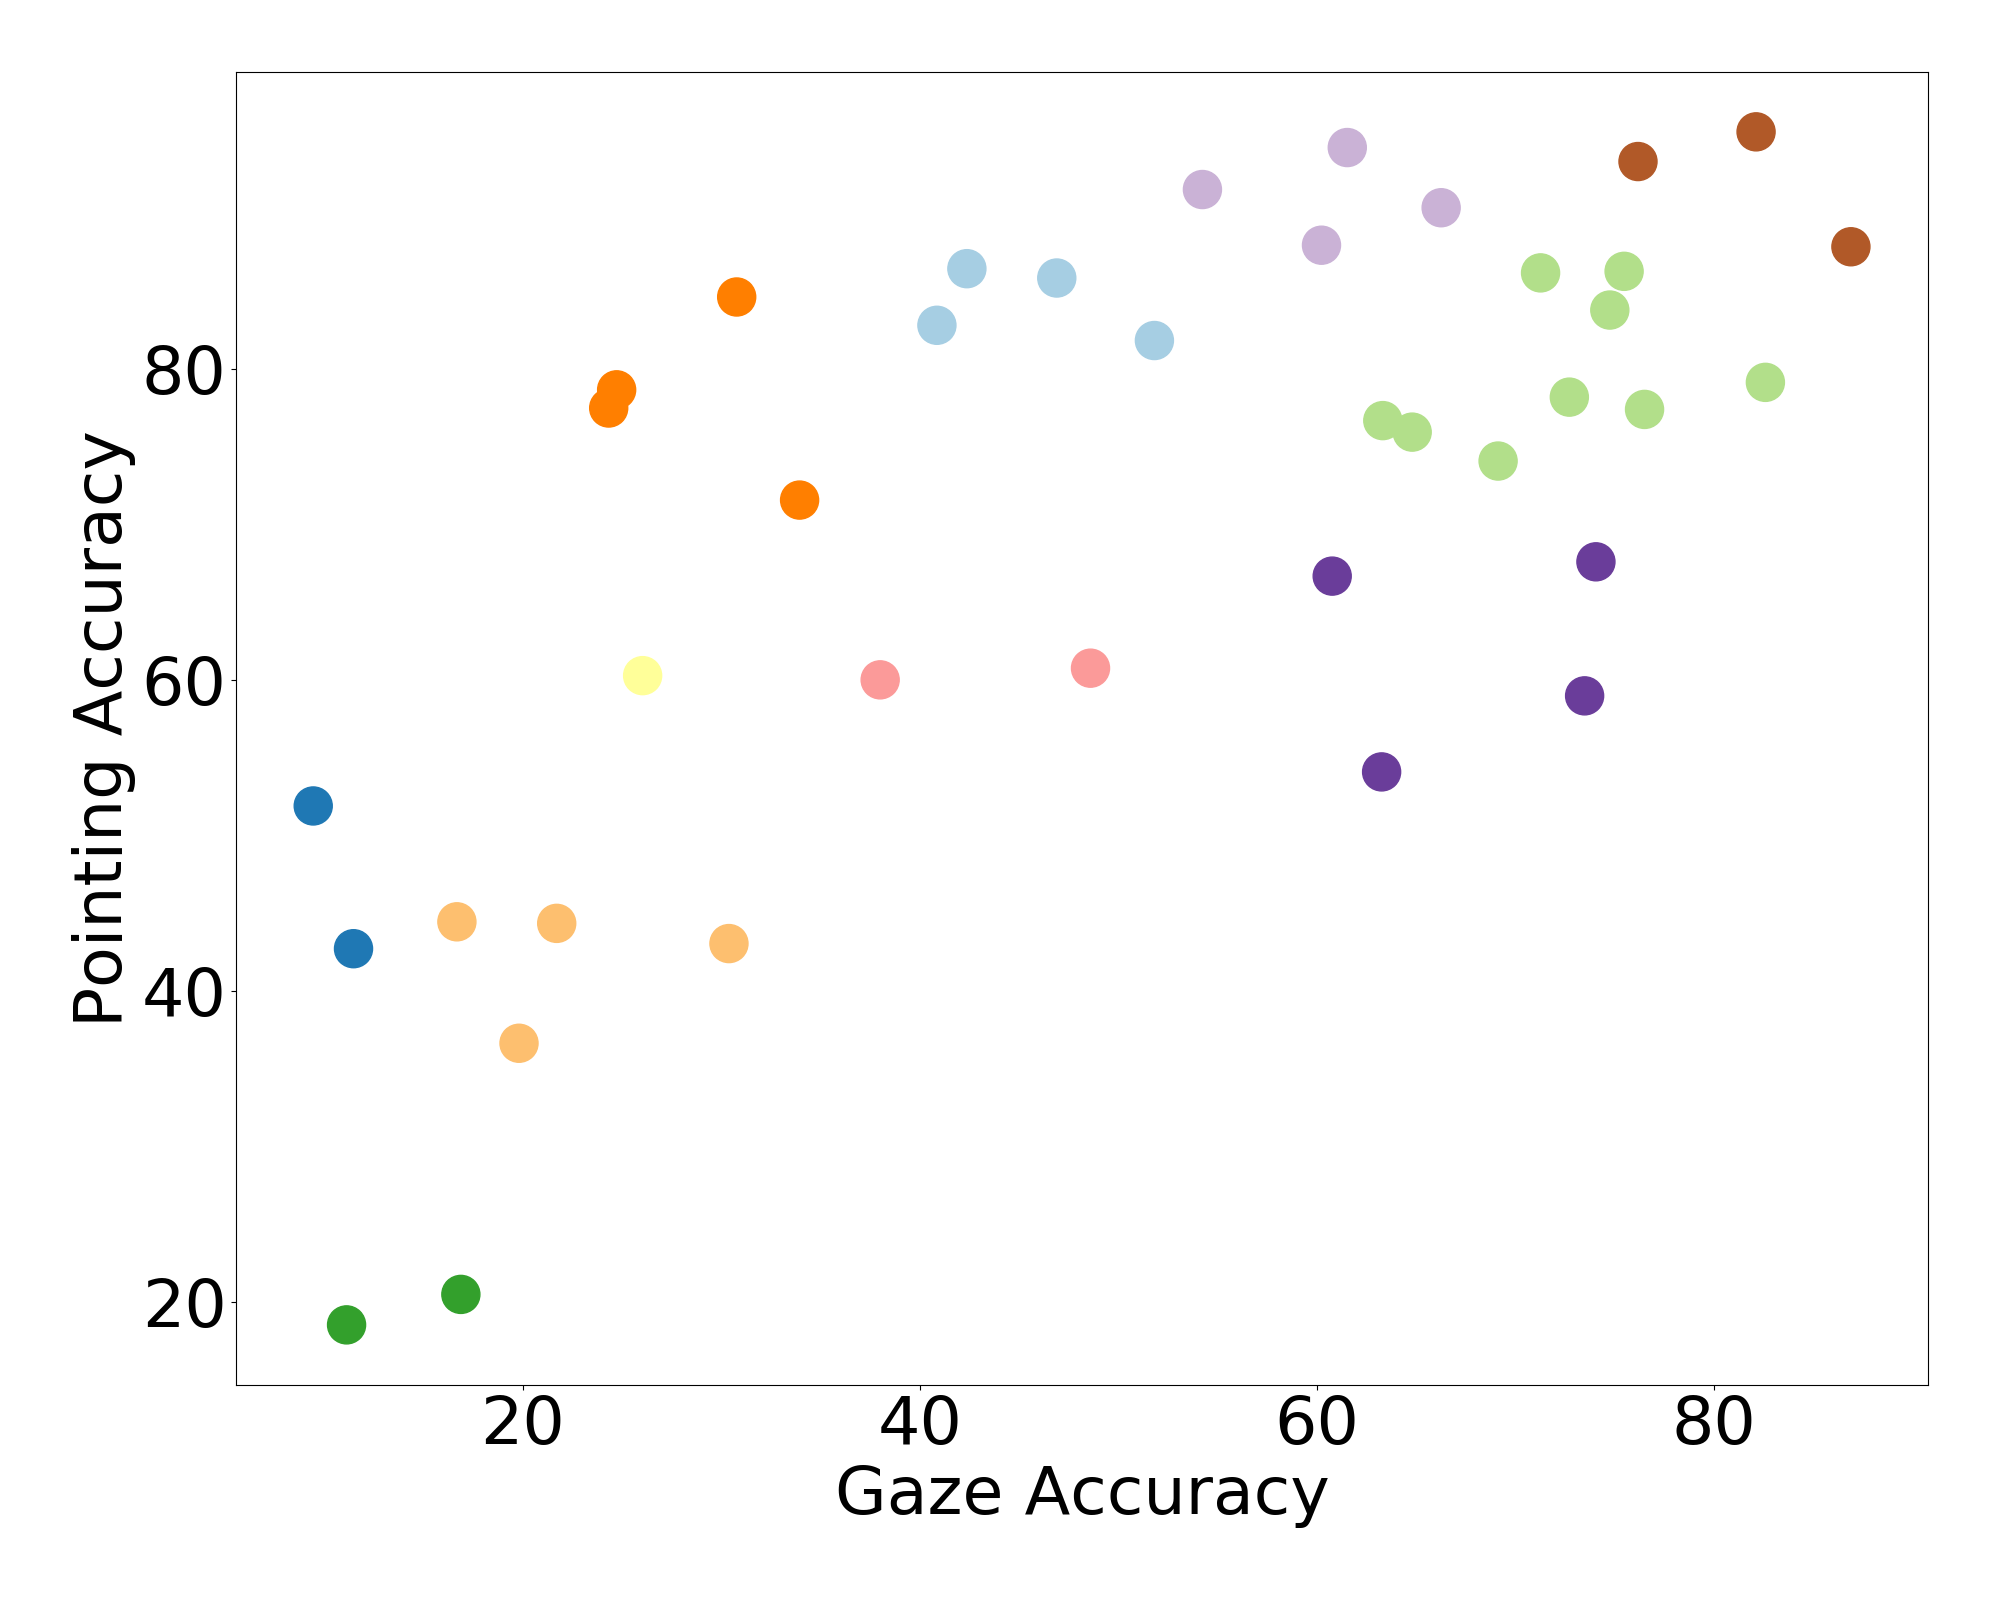

In [29]:


N = 11

#pca = PCA(n_components=2).fit_transform(accuracy_features)
#print(pca.shape)
#print("==========================")


kmeans = KMeans(n_clusters=N, random_state=420).fit(accuracy_features)
#kmeans.labels_.shape

for i in range(N):
    print("cluster ",i)
    print("length ",np.where(kmeans.labels_ == i)[0].shape[0])
    print(np.where(kmeans.labels_ == i)[0])
    print("-----------------------------------")
    

fig, ax = plt.subplots(figsize=(20, 16))
scatter = ax.scatter(accuracy_features[:, 0], accuracy_features[:, 1], c=kmeans.labels_, s=750, cmap='Paired')
plt.xlabel('Gaze Accuracy')
plt.ylabel('Pointing Accuracy')
#plt.xlabel('First Principal Component')
#plt.ylabel('Second Principal Componenet')


# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scatter.legend_elements(),
#                    loc="upper right", title="Clusters")
#ax.add_artist(legend1)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 58})
# plt.savefig('kmeans_cluster_accuracies.pdf')
plt.show()